In [1]:
# Project 02 (Template)

In [2]:
# load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
data_train = pd.read_csv('Final.csv')
data_train.
data_test = pd.read_csv('demographics_test.csv')
output = data_test[['County','State']]

In [4]:
folds = KFold(n_splits= 5,shuffle=False,random_state=0)
for train_index, test_index in folds.split(data_train):
    print([train_index.shape[0], test_index.shape[0]])
test_len = test_index.shape[0]

[1691, 423]
[1691, 423]
[1691, 423]
[1691, 423]
[1692, 422]


In [5]:
# Change to input test data
x_data = data_train
y_data_demo = data_train['Democratic']
y_data_repub = data_train['Republic']

# Democratic Votes

### Ques 2: Scaling the data

In [6]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data["2014 Population"].values.reshape(-1,1))

### Ques 3: Linear Regression

In [7]:
# Cross validation (Democratic Votes)
model = LinearRegression()
scores =  cross_val_score(model,X=x_data_scaled,y=y_data_demo,cv=folds)
print('R squared Value')
print(scores.mean()) 

R squared Value
0.7692627889626266


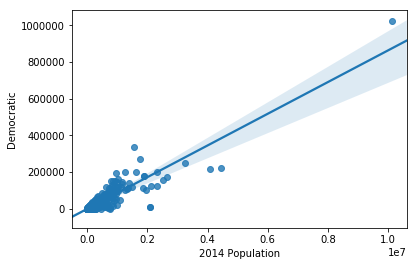

In [8]:
ax = sns.regplot(data_train["2014 Population"],data_train['Democratic'])

### Ques4: Multiple Regression

In [9]:
mul_x_data_scaled = scaler.fit_transform(x_data[['2014 Population', 'Percent Under 18 Years', 'Percent Female', 'Percent White', 'Veterans']])

In [10]:
model = LinearRegression()
r_squared_scores =  cross_val_score(model,X=mul_x_data_scaled,y=y_data_demo,cv=folds)
adj_r_squared_score = 1-(((1-r_squared_scores.mean())*(test_len-1))/(test_len-mul_x_data_scaled.shape[1]-1))
print('Test R2 \t   Test Adj. R2')
print(r_squared_scores.mean(),adj_r_squared_score)

Test R2 	   Test Adj. R2
0.77843567016485 0.7757726373543314


In [11]:
# Test data Output file Democratic votes
mul_test_data_scaled = scaler.transform(data_test[['2014 Population', 'Percent Under 18 Years', 'Percent Female', 'Percent White', 'Veterans']])
model = LinearRegression().fit(mul_x_data_scaled,y_data_demo)
output['Democratic'] = np.absolute(np.round((model.predict(mul_test_data_scaled))))

In [12]:
output.head()

,County,State,Democratic
0,Fremont,ID,3790.0
1,Love,OK,299.0
2,Fayette,PA,10558.0
3,Dent,MO,407.0
4,Monroe,MI,10791.0


# Republic Votes

### Ques 5: Linear Regression

In [13]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data["Veterans"].values.reshape(-1,1))

In [14]:
# Cross Validation Method (Republican Votes)
model = LinearRegression()
scores =  cross_val_score(model,X=x_data_scaled,y=y_data_repub,cv=folds)
print('R squared Value')
print(scores.mean()) 

R squared Value
0.688409212246721


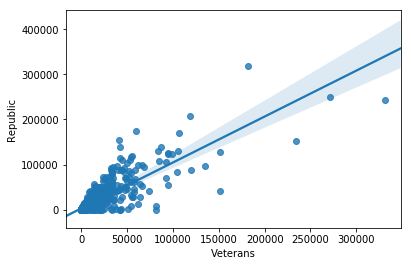

In [15]:
ax = sns.regplot(data_train["Veterans"],data_train['Republic'])

### Ques 6: Multiple Regression

In [16]:
#  Model (Republic Votes)
mul_x_data_scaled = scaler.fit_transform(x_data[['Percent Female', 'Veterans','Percent Two or More Races',"Percent Bachelor's Degree or Higher",'Percent Under 18 Years'
]])

In [17]:
model = LinearRegression()
r_squared_scores =  cross_val_score(model,X=mul_x_data_scaled,y=y_data_repub,cv=folds)
adj_r_squared_score = 1-(((1-r_squared_scores.mean())*(test_len-1))/(test_len-mul_x_data_scaled.shape[1]-1))
print('Test R2 \t   Test Adj. R2')
print(r_squared_scores.mean(),adj_r_squared_score)

Test R2 	   Test Adj. R2
0.706754547246586 0.7032299624779152


In [18]:
# Test data Output file Republican Votes
mul_test_data_scaled = scaler.transform(data_test[['Percent Female', 'Veterans','Percent Two or More Races',"Percent Bachelor's Degree or Higher",'Percent Under 18 Years']])
model = LinearRegression().fit(mul_x_data_scaled,y_data_demo)
output['Republic'] = np.absolute(np.round((model.predict(mul_test_data_scaled))))

In [19]:
output.head()

,County,State,Democratic,Republic
0,Fremont,ID,3790.0,1465.0
1,Love,OK,299.0,6225.0
2,Fayette,PA,10558.0,16929.0
3,Dent,MO,407.0,452.0
4,Monroe,MI,10791.0,15513.0


## Ques 7 (Democratic Vs Republican)

In [20]:
demograph_train = data_train[list(data_train.columns.values[49:-3])]
target_county = data_train['Party']

### KNN

In [21]:
# Party Classification (KNN)
scaled_demograph_train = scaler.fit_transform(demograph_train[['2014 Population', 'Population Percent Change',
        'Percent Female', 'Percent White',  
       'Percent American Indian and Alaska Native', 'Percent Asian',
       'Percent Native Hawaiian and Other Pacific Islander',
       'Percent Hispanic or Latino',
       'Percent White, not Hispanic or Latino',
       'Percent Foreign Born', 'Percent High School or Higher',
       "Percent Bachelor's Degree or Higher",
       'Percent Housing Units in Multi-Unit Structures'          
       ]])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(scaled_demograph_train,target_county,test_size = 0.30,random_state = 0)

In [23]:
#Cross val scores
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5),x_train,y_train,cv=folds)
print(scores)
print(scores.mean())

[0.81081081 0.77364865 0.7972973  0.77027027 0.7559322 ]
0.7815918460833715


#### Evaluation Metrics KNN

In [24]:
# Test Set Evaluation Metrics
model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, precision, recall, F1_score])

[0.8204724409448819, 0.7380952380952381, 0.5344827586206896, 0.62]


### Classification of Party of test data using KNN Model

In [25]:
scaled_test_data = scaler.transform(data_test[['2014 Population', 'Population Percent Change',
        'Percent Female', 'Percent White',  
       'Percent American Indian and Alaska Native', 'Percent Asian',
       'Percent Native Hawaiian and Other Pacific Islander',
       'Percent Hispanic or Latino',
       'Percent White, not Hispanic or Latino',
       'Percent Foreign Born', 'Percent High School or Higher',
       "Percent Bachelor's Degree or Higher",
       'Percent Housing Units in Multi-Unit Structures'  ]])
model = KNeighborsClassifier(n_neighbors=5).fit(scaled_demograph_train,target_county)
y_pred = model.predict(scaled_test_data)
output['Party'] = y_pred

#### Final Output Head

In [26]:
output.head()

,County,State,Democratic,Republic,Party
0,Fremont,ID,3790.0,1465.0,0
1,Love,OK,299.0,6225.0,0
2,Fayette,PA,10558.0,16929.0,0
3,Dent,MO,407.0,452.0,0
4,Monroe,MI,10791.0,15513.0,0


### Decision Tree

In [27]:
# Party Classification (Decision Tree)
scaled_demograph_train = scaler.fit_transform(demograph_train[['2014 Population', '2010 Population', 'Population Percent Change',
       'Percent Under 5 Years',
       'Percent 65 and Older',
       'Percent Black or African American',
       'Percent American Indian and Alaska Native', 'Percent Asian',
       'Percent Two or More Races', 
       'Percent White, not Hispanic or Latino', 'Veterans',
       'Percent Foreign Born',
        'Housing Units',
       'Percent Housing Units in Multi-Unit Structures',
       'Homeownership Rate', 
        'Households', 'Persons per Household',
       'Percent Living in Same House +1 Years',
        'Median Household Income',
       'Per Capita Income', 'Percent Below Poverty Level',
       'Accommodation and Food Services Sales',
       'Land Area']])

In [28]:
x_train,x_test,y_train,y_test = train_test_split(scaled_demograph_train,target_county,test_size = 0.30,random_state = 0)

In [29]:
#Cross val scores
scores = cross_val_score(DecisionTreeClassifier(random_state=0),x_train,y_train,cv=folds)
print(scores)
print(scores.mean())

[0.71959459 0.75       0.7027027  0.73986486 0.76610169]
0.7356527714154832


#### Evaluation Metrics Decision Tree

In [30]:
model = DecisionTreeClassifier(random_state=0).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, precision, recall, F1_score])

[0.7732283464566929, 0.576530612244898, 0.6494252873563219, 0.6108108108108108]


### Random Forrest

In [31]:
# Party Classification (Random Forrest Tree)
scaled_demograph_train = scaler.fit_transform(demograph_train[['2014 Population',
 'Percent Under 18 Years',
 'Percent 65 and Older',
 'Percent Female',
 'Percent White',
 'Percent Black or African American',
 'Percent American Indian and Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian and Other Pacific Islander',
 'Percent Two or More Races',
 'Percent Hispanic or Latino',
 'Percent White, not Hispanic or Latino',
 'Veterans',
 'Percent Foreign Born',
 'Percent High School or Higher',
 "Percent Bachelor's Degree or Higher"]])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(scaled_demograph_train,target_county,test_size = 0.30,random_state = 0,shuffle=True)

In [33]:
#Cross val scores
scores = cross_val_score(RandomForestClassifier(criterion='gini',random_state=0),x_train,y_train,cv=folds)
print(scores)
print(scores.mean())

[0.81418919 0.78040541 0.79054054 0.80405405 0.79661017]
0.7971598717361429


#### Evaluation Metrics Random Forrest

In [34]:
model = RandomForestClassifier(criterion='gini',random_state=0).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, precision, recall, F1_score])

[0.8204724409448819, 0.7884615384615384, 0.47126436781609193, 0.5899280575539568]


### Naive Bayes

In [35]:
# Party Classification (Naive Bayes)
scaled_demograph_train = scaler.fit_transform(demograph_train[[
        'Percent Under 18 Years',
       'Percent 65 and Older', 'Percent Female', 'Percent White',
       'Percent Black or African American','Veterans',
       'Percent Two or More Races', 'Percent Hispanic or Latino',
       'Percent White, not Hispanic or Latino', 'Veterans',
       'Percent Foreign Born',
       "Percent Bachelor's Degree or Higher"
]])

In [36]:
x_train,x_test,y_train,y_test = train_test_split(scaled_demograph_train,target_county,test_size = 0.30,random_state = 0)

In [37]:
#Cross val scores
scores = cross_val_score(GaussianNB(),x_train,y_train,cv=folds)
print(scores)
print(scores.mean())

[0.77364865 0.79054054 0.73648649 0.75337838 0.76271186]
0.7633531836921668


#### Evaluation Metrics Naive Bayes

In [38]:
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, precision, recall, F1_score])

[0.8, 0.6715328467153284, 0.5287356321839081, 0.5916398713826366]


## Ques 8: CLUSTERING

### K-Means

In [63]:
scaled_demograph_train = scaler.fit_transform(demograph_train[['2014 Population',
 'Percent Under 5 Years',
 'Percent Female',
 'Percent White',
 'Percent Black or African American',
 'Percent American Indian and Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian and Other Pacific Islander',
 'Percent Two or More Races', 'Percent Hispanic or Latino'                                                        
]])

In [64]:
clustering = KMeans(n_clusters=2,init='random',random_state=0).fit(scaled_demograph_train)
clusters = clustering.labels_

In [78]:
# Labeling counties using cluster labels
data_train['Cluster Labels'] = clusters

### Supervised evaluation metrics for K-Means

In [66]:
accuracy = metrics.accuracy_score(data_train['Party'],clusters)
precision = metrics.precision_score(data_train['Party'],clusters)
recall = metrics.recall_score(data_train['Party'],clusters)
F1_score = metrics.f1_score(data_train['Party'],clusters)
print([accuracy, precision, recall, F1_score])

[0.7218543046357616, 0.4810924369747899, 0.4017543859649123, 0.43785850860420655]


### Unsupervised evaluation metrics for K-means

In [86]:
adjusted_rand_index = metrics.adjusted_rand_score(data_train['Party'],clusters)
silhouette_coefficient = metrics.silhouette_score(data_train['Party'].values.reshape(-1,1),clusters)
print('Adj Rand Index \t\t Silhouette Coeff')
print([adjusted_rand_index, silhouette_coefficient])

Adj Rand Index 		 Silhouette Coeff
[0.14159850782471162, 0.26301638503918917]


### Ward's Linkage

In [44]:
scaled_demograph_train = scaler.fit_transform(demograph_train[['2014 Population',
 'Percent Under 18 Years',
 'Percent 65 and Older',
 'Percent Female',
 'Percent White',
 'Percent Black or African American',
 'Percent American Indian and Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian and Other Pacific Islander',
 'Percent Two or More Races',
 'Percent Hispanic or Latino',
 'Percent White, not Hispanic or Latino',
 'Veterans',
 'Percent Foreign Born',
 'Percent High School or Higher',
 "Percent Bachelor's Degree or Higher",
 'Median Household Income','Percent Housing Units in Multi-Unit Structures']])

In [45]:
clustering = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(scaled_demograph_train)
clusters = clustering.labels_

### Supervised evaluation metrics for Ward's Linkage

In [46]:
accuracy = metrics.accuracy_score(data_train['Party'],clusters)
precision = metrics.precision_score(data_train['Party'],clusters)
recall = metrics.recall_score(data_train['Party'],clusters)
F1_score = metrics.f1_score(data_train['Party'],clusters)
print([accuracy, precision, recall, F1_score])

[0.7081362346263008, 0.44547563805104406, 0.3368421052631579, 0.3836163836163836]


### Unsupervised evaluation metrics for Ward's Linkage

In [85]:
adjusted_rand_index = metrics.adjusted_rand_score(data_train['Party'],clusters)
silhouette_coefficient = metrics.silhouette_score(data_train['Party'].values.reshape(-1,1),clusters)
print('Adj Rand Index \t\t Silhouette Coeff')
print([adjusted_rand_index, silhouette_coefficient])

Adj Rand Index 		 Silhouette Coeff
[0.14159850782471162, 0.26301638503918917]


## Ques 9: Clusted Counties Map

In [67]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='adarshjv20', api_key='VhR37dcVwvfCYHbv3qO0')

In [70]:
fips_data = pd.read_excel('Fips.xlsx')
cols = fips_data.iloc[0,:]
cols[1] = 'County'
fips_data.columns = cols
fips_data = fips_data.drop(0)

In [71]:
State_list = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [72]:
fips_data['FIPS'] = fips_data['FIPS State'] + fips_data['FIPS County']
fips_data['State'] = fips_data['State'].map(State_list)

In [79]:
fips_data.head()

,State,County,FIPS State,FIPS County,FIPS
1,AL,Autauga,01,001,01001
2,AL,Baldwin,01,003,01003
3,AL,Barbour,01,005,01005
4,AL,Bibb,01,007,01007
5,AL,Blount,01,009,01009


In [81]:
final = pd.merge(data_train,fips_data,on=['State','County'])

In [83]:
# Plot Counties
fips = final['FIPS'].tolist()
values = final['Cluster Labels'].tolist()
colorscale = ["#ffa500","#0b4083"]
fig = ff.create_choropleth(fips=fips, values=values, colorscale=colorscale,legend_title='County',title='Clustered Counties')
py.iplot(fig, filename='choropleth of some cali counties - full usa scope')


The draw time for this plot will be slow for clients without much RAM.
